# Band Gap Predictor Using Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dlhub_sdk.client import DLHubClient
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

In [2]:
shuffled = pd.read_csv('full_shuffled_dataset.csv',index_col=0)

x_test = shuffled.values[int(0.80*len(shuffled)):,:-1]
y_test = shuffled.values[int(0.80*len(shuffled)):,-1]


In [3]:
DL = DLHubClient.login()
rforest_name = 'GREGOIRE_TEST_1_17_2019'
y_out = DL.run(author='mschwarting_anl',name = rforest_name, inputs=x_test.tolist())[0]


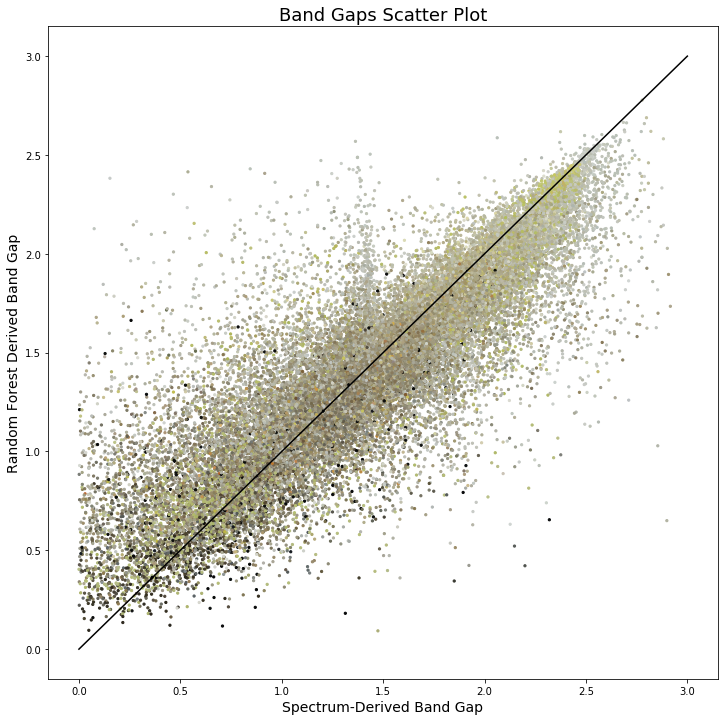

In [4]:
plot_colors = np.array([i for i in zip(shuffled['R_channel avg'].tolist()[int(0.80*len(shuffled)):],\
                           shuffled['G_channel avg'].tolist()[int(0.80*len(shuffled)):],\
                           shuffled['B_channel avg'].tolist()[int(0.80*len(shuffled)):])])/255.

plt.figure(figsize=(12,12))
plt.scatter(y_test,y_out,s=5,alpha=1,color=plot_colors)
plt.xlabel('Spectrum-Derived Band Gap',fontsize=14)
plt.ylabel('Random Forest Derived Band Gap',fontsize=14)
plt.title('Band Gaps Scatter Plot',fontsize=18)
plt.plot([0,3],[0,3],color='black')
plt.show()


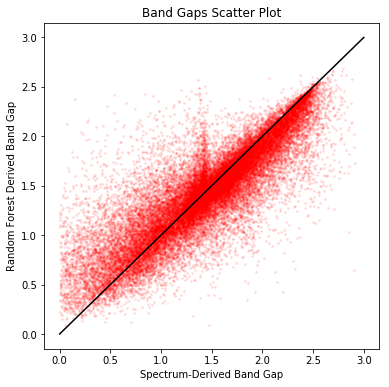

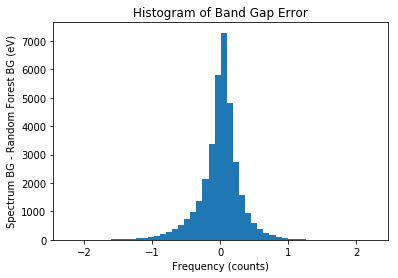

Mean Error: 3.43 meV
Standard Deviation: 298.41 meV
MAE: 205.22 meV
MSE: 89.06 meV
RMSE: 298.43 meV


In [5]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_out,s=3,alpha=0.1,color='red')
plt.xlabel('Spectrum-Derived Band Gap')
plt.ylabel('Random Forest Derived Band Gap')
plt.title('Band Gaps Scatter Plot')
plt.plot([0,3],[0,3],color='black')
plt.show()
error = np.array(y_test)-np.array(y_out)
plt.figure()
plt.xlabel('Frequency (counts)')
plt.ylabel('Spectrum BG - Random Forest BG (eV)')
plt.title('Histogram of Band Gap Error')
plt.hist(error,50)
plt.show()
print('Mean Error: '+str(round(np.average(error)*1000,2))+' meV')
print('Standard Deviation: '+str(round(np.std(error)*1000,2))+' meV')
#sns.distplot(error)
print('MAE: '+str(round(mean_absolute_error(y_test, y_out)*1000,2))+' meV')
print('MSE: '+str(round(mean_squared_error(y_test, y_out)*1000,2))+' meV')
print('RMSE: '+str(round((mean_squared_error(y_test, y_out)**0.5)*1000,2))+' meV')
